<a href="https://colab.research.google.com/github/KLeeDE/Data-Science/blob/master/ARE%20GREEN%20SPACES%20EQUITABLY%20DISTRIBUTED%20IN%20NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the Group Notebook for Anthony, Kay and Tom for the DSTEP20 final

**PROBLEM STATEMENT: ARE GREEN SPACES EQUITABLY DISTRIBUTED IN NYC?**
Our approach to this problem is as follows:
We are going to combine datasets from the US Census and NYC DPR  a merged file we can use. We want to combine income data, park geographic data and park inspection data in our file.

In [0]:
!pip install geopandas # install geopandas on the google vm

In [0]:
# import needed libraries
import pandas as pd
import numpy as np
from google.colab import drive
import geopandas as gp 
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
econfname = "drive/My Drive/KAT_Group_Final/ACS_17_5YR_S1901_with_ann.csv"
econ = pd.read_csv(econfname, header=1)
#econ

In [0]:
econ_rel = econ[["Id","Id2","Geography","Households; Estimate; Total","Households; Estimate; Median income (dollars)","Households; Estimate; Mean income (dollars)"]]

In [0]:
tract = gp.read_file("drive/My Drive/KAT_Group_Final/tl_2010_36_tract10.shp")

In [0]:
tract["GEOID10"] = tract["GEOID10"].astype(str)
econ_rel["Id2"] = econ_rel["Id2"].astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
econ_tract = tract.merge(econ_rel, left_on="GEOID10", right_on="Id2")
econ_tract = econ_tract[econ_tract.COUNTYFP10.isin(["005","047","085","081","061"])]

In [0]:
park =  gp.read_file("https://data.cityofnewyork.us/api/geospatial/k2ya-ucmv?method=export&format=GeoJSON", low_memory=False)
park.dtypes

us_congres      object
mapped          object
global_id       object
zipcode         object
acres           object
location        object
typecatego      object
commission      object
url             object
permitpare      object
eapply          object
parentid        object
gispropnum      object
acquisitio      object
retired         object
subcategor      object
jurisdicti      object
objectid        object
communityb      object
name311         object
permitdist      object
pip_ratabl      object
department      object
precinct        object
permit          object
omppropid       object
gisobjid        object
signname        object
address         object
nys_assemb      object
class           object
nys_senate      object
councildis      object
borough         object
waterfront      object
geometry      geometry
dtype: object

In [0]:
inspection = pd.read_csv("drive/My Drive/KAT_Group_Final/Parks_Inspection_Program___Inspections.csv", low_memory=False,parse_dates=["Date"])
inspection.sort_values("Prop ID")

,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
72341,B001,01,67477,Spring,4,2010-04-05,10:36 AM,10:51 AM,2010,6,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,04/05/2010 01:27:00 PM
66786,B001,01,71222,Winter,3,2010-12-17,10:00 AM,10:20 AM,2010,15,NaN,A,A,NaN,NaN,NaN,NaN,"It seems falling debris from large, concrete b...",PIP,12/17/2010 02:01:00 PM
61383,B001,01,57680,Summer,1,1908-06-28,03:00 PM,03:06 PM,1908,13,NaN,A,A,NaN,NaN,NaN,NaN,Actual time of inspection: 11:15am - 11:50am.,WEPIP,06/28/2008 03:00:00 PM
33597,B001,01,54246,Winter,1,2007-11-26,11:47 AM,12:20 PM,2007,13,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
18913,B001,01,26115,Spring,6,2003-11-07,02:34 PM,02:35 PM,2003,33,NaN,U,A,NaN,NaN,NaN,NaN,NaN,PIP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74869,XZ99,03,78421,Spring,5,2012-04-24,11:05 AM,11:10 AM,2012,16,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,04/24/2012 02:05:00 PM
66730,XZ99,03,83660,Spring,4,2013-04-24,09:45 AM,09:50 AM,2013,3,NaN,A,A,NaN,NaN,NaN,NaN,NaN,PIP,04/24/2013 02:17:00 PM
97933,XZ99,03,113125,Winter,1,2017-12-04,11:13 AM,11:18 AM,2017,11,NaN,A,A,NaN,NaN,0.0,NaN,NaN,PIP,12/04/2017 01:47:00 PM
109773,XZ99,03,125500,Fall,3,2019-10-08,12:11 PM,12:19 PM,2019,11,NaN,A,A,NaN,NaN,0.0,NaN,NaN,PIP,10/08/2019 01:50:00 PM


In [0]:
inspectlatest = inspection.sort_values("Date").groupby("Prop ID").last().reset_index()
inspectlatest

,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate
0,B001,01,124176,Summer,5,2019-08-06,09:50 AM,10:20 AM,2019,18,57.0,A,A,NaN,NaN,15.0,Under Construction.,Exterior and interior of playground flooded wi...,PIP,08/06/2019 01:56:00 PM
1,B002,18,126348,Fall,6,2019-11-26,10:10 AM,10:30 AM,2019,15,NaN,A,A,NaN,NaN,15.0,Partial Constr./Rest of Site Rated.,Section of lawn at the south end blocked off t...,PIP,11/26/2019 01:35:00 PM
2,B003,19,125041,Fall,2,2019-09-13,10:30 AM,10:40 AM,2019,16,NaN,A,A,NaN,NaN,5.0,NaN,SW not rated due to snow cover.,PIP,09/13/2019 02:39:00 PM
3,B006,03,124997,Fall,2,2019-09-12,09:14 AM,09:25 AM,2019,59,NaN,A,A,NaN,NaN,0.0,NaN,Actual time of inspection: 10:52-11:00,PIP,09/12/2019 02:15:00 PM
4,B007,11,125690,Fall,4,2019-10-18,09:10 AM,10:00 AM,2019,15,13.0,U,A,NaN,NaN,55.0,Partial Constr./Rest of Site Rated.,Most of north half (section north of Belt Park...,PIP,10/18/2019 01:05:00 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,XZ94,04,120881,Winter,5,2019-02-11,10:00 AM,10:05 AM,2018,16,NaN,A,A,NaN,NaN,0.0,NaN,"""N"" ratings for SW, PS and HORT due to snow co...",PIP,02/11/2019 12:46:00 PM
3917,XZ95,04,96732,Spring,6,2015-05-28,10:09 AM,10:12 AM,2015,11,NaN,N,N,NaN,NaN,0.0,NaN,Planter removed.,PIP,05/28/2015 01:43:00 PM
3918,XZ96,04,98867,Fall,2,2015-09-28,11:03 AM,11:06 AM,2015,1,NaN,N,N,NaN,NaN,0.0,NaN,No longer exists.,PIP,09/28/2015 02:42:00 PM
3919,XZ97,04,91793,Summer,5,2014-08-19,10:50 AM,10:55 AM,2014,6,NaN,N,N,NaN,NaN,NaN,NaN,Greenstreet no longer present.,PIP,08/19/2014 01:11:00 PM


In [0]:
park["omppropid"] = park["omppropid"].astype(str)
inspectlatest["Prop ID"] = inspection["Prop ID"].astype(str)

In [0]:
inspect_parks = inspectlatest.merge(park, left_on="Prop ID", right_on="gispropnum")
#inspect_parks["geometry"] = inspect_parks["the_geom"]
inspect_parks.head()

,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry
0,B045,01,124176,Summer,5,2019-08-06,09:50 AM,10:20 AM,2019,18,57.0,A,A,NaN,NaN,15.0,Under Construction.,Exterior and interior of playground flooded wi...,PIP,08/06/2019 01:56:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ..."
1,B045,10,125429,Fall,3,2019-10-03,09:39 AM,10:59 AM,2019,57,NaN,A,A,NaN,NaN,25.0,Partial Constr./Rest of Site Rated.,Construction work along Bradhurst & Edgecombe ...,PIP,10/03/2019 02:12:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ..."
2,B094,19,125041,Fall,2,2019-09-13,10:30 AM,10:40 AM,2019,16,NaN,A,A,NaN,NaN,5.0,NaN,SW not rated due to snow cover.,PIP,09/13/2019 02:39:00 PM,11,False,{9103CDC0-D772-4BB7-AB3B-503997E4E80F},11229,0.001,"E. 12 St., Kings Hwy., Quentin Rd.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B094/,B-15,Sgt. Joyce Kilmer Triangle,B-15,B094,19340720000000.00000,False,Sitting Area/Triangle/Mall,DPR,6043,315,Sgt. Joyce Kilmer Triangle,B-15,Yes,B-15,61,Y,B094,100003699,Sgt. Joyce Kilmer Triangle,None,45,PARK,17,48,B,No,"MULTIPOLYGON (((-73.96082 40.60785, -73.96084 ..."
3,Q427,03,124997,Fall,2,2019-09-12,09:14 AM,09:25 AM,2019,59,NaN,A,A,NaN,NaN,0.0,NaN,Actual time of inspection: 10:52-11:00,PIP,09/12/2019 02:15:00 PM,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ..."
4,Q427,05,52715,Summer,5,1907-08-17,10:02 AM,10:27 AM,1907,3,NaN,A,A,NaN,NaN,NaN,NaN,2 Trust For Public Land signs at entrance (wit...,SCHOOLS,NaN,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ..."


In [0]:
inspect_parks.dtypes

Prop ID            object
AMPSDistrict       object
Inspection ID       int64
Season             object
Round               int64
                   ...   
nys_senate         object
councildis         object
borough            object
waterfront         object
geometry         geometry
Length: 56, dtype: object

In [0]:
econ_tract.dtypes

STATEFP10                                          object
COUNTYFP10                                         object
TRACTCE10                                          object
GEOID10                                            object
NAME10                                             object
NAMELSAD10                                         object
MTFCC10                                            object
FUNCSTAT10                                         object
ALAND10                                             int64
AWATER10                                            int64
INTPTLAT10                                         object
INTPTLON10                                         object
geometry                                         geometry
Id                                                 object
Id2                                                object
Geography                                          object
Households; Estimate; Total                         int64
Households; Es

In [0]:
econ_tract["park_tract"] = np.zeros(len(econ_tract))
econ_tract.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Id,Id2,Geography,Households; Estimate; Total,Households; Estimate; Median income (dollars),Households; Estimate; Mean income (dollars),park_tract
191,36,085,001700,36085001700,17,Census Tract 17,G5020,S,303568,0,+40.6343907,-074.0812548,"POLYGON ((-74.08508 40.63469, -74.08444 40.635...",1400000US36085001700,36085001700,"Census Tract 17, Richmond County, New York",594,41154,78363,0.0
192,36,085,000600,36085000600,6,Census Tract 6,G5020,S,1046778,1757917,+40.6181527,-074.0626420,"POLYGON ((-74.04908 40.61483, -74.04810 40.613...",1400000US36085000600,36085000600,"Census Tract 6, Richmond County, New York",1136,32778,70129,0.0
193,36,085,000700,36085000700,7,Census Tract 7,G5020,S,632261,532954,+40.6473695,-074.0782043,"POLYGON ((-74.09125 40.64944, -74.09058 40.649...",1400000US36085000700,36085000700,"Census Tract 7, Richmond County, New York",2402,40147,52910,0.0
194,36,085,001800,36085001800,18,Census Tract 18,G5020,S,1043953,1313874,+40.6019091,-074.0537589,"POLYGON ((-74.04633 40.60273, -74.05487 40.588...",1400000US36085001800,36085001800,"Census Tract 18, Richmond County, New York",186,83438,86017,0.0
195,36,085,000300,36085000300,3,Census Tract 3,G5020,S,584130,1917454,+40.6446304,-074.0719887,"POLYGON ((-74.05623 40.63818, -74.06935 40.638...",1400000US36085000300,36085000300,"Census Tract 3, Richmond County, New York",987,72386,84554,0.0


In [0]:
inspect_parks = gp.GeoDataFrame(inspect_parks)
inspect_parks.dtypes
# Park scores are A for acceptable, U for unacceptable and N for Not Scored
print(inspect_parks[inspect_parks['Overall Condition'] == 'A'] ) # How many parks are ranked "A"?
print(inspect_parks[inspect_parks['Overall Condition'] == 'U'] ) # How many parks are ranked "U"?
print(inspect_parks[inspect_parks['Overall Condition'] == 'N'] ) # How many parks are ranked "N"?

     Prop ID  ...                                           geometry
0       B045  ...  MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...
1       B045  ...  MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...
2       B094  ...  MULTIPOLYGON (((-73.96082 40.60785, -73.96084 ...
3       Q427  ...  MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...
4       Q427  ...  MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...
...      ...  ...                                                ...
1978    Q225  ...  MULTIPOLYGON (((-73.81881 40.61025, -73.81884 ...
1979    B022  ...  MULTIPOLYGON (((-73.95486 40.70068, -73.95551 ...
1980    B364  ...  MULTIPOLYGON (((-73.92843 40.67434, -73.92885 ...
1981    Q344  ...  MULTIPOLYGON (((-73.80623 40.73055, -73.80627 ...
1982  B223MA  ...  MULTIPOLYGON (((-73.98044 40.69603, -73.98043 ...

[1714 rows x 56 columns]
     Prop ID  ...                                           geometry
5     B223IC  ...  MULTIPOLYGON (((-73.98763 40.70133, -73.98748 ...
25      

In [0]:
#create a numeric score for the parks: A = 1000, N = 200, U = 0
#create a data dictionary for the scoring
KATscore_dictionary = {'A': 1000, 'N': 200, 'U': 0}

# add a new column called KAT_score to the inspect_parks DF
inspect_parks['KATscore'] = inspect_parks['Overall Condition'].map(KATscore_dictionary)


In [0]:
# Print the DataFrame
#pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 50)
inspect_parks

,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,KATscore
0,B045,01,124176,Summer,5,2019-08-06,09:50 AM,10:20 AM,2019,18,57.0,A,A,NaN,NaN,15.0,Under Construction.,Exterior and interior of playground flooded wi...,PIP,08/06/2019 01:56:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...",1000
1,B045,10,125429,Fall,3,2019-10-03,09:39 AM,10:59 AM,2019,57,NaN,A,A,NaN,NaN,25.0,Partial Constr./Rest of Site Rated.,Construction work along Bradhurst & Edgecombe ...,PIP,10/03/2019 02:12:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...",1000
2,B094,19,125041,Fall,2,2019-09-13,10:30 AM,10:40 AM,2019,16,NaN,A,A,NaN,NaN,5.0,NaN,SW not rated due to snow cover.,PIP,09/13/2019 02:39:00 PM,11,False,{9103CDC0-D772-4BB7-AB3B-503997E4E80F},11229,0.001,"E. 12 St., Kings Hwy., Quentin Rd.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B094/,B-15,Sgt. Joyce Kilmer Triangle,B-15,B094,19340720000000.00000,False,Sitting Area/Triangle/Mall,DPR,6043,315,Sgt. Joyce Kilmer Triangle,B-15,Yes,B-15,61,Y,B094,100003699,Sgt. Joyce Kilmer Triangle,None,45,PARK,17,48,B,No,"MULTIPOLYGON (((-73.96082 40.60785, -73.96084 ...",1000
3,Q427,03,124997,Fall,2,2019-09-12,09:14 AM,09:25 AM,2019,59,NaN,A,A,NaN,NaN,0.0,NaN,Actual time of inspection: 10:52-11:00,PIP,09/12/2019 02:15:00 PM,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...",1000
4,Q427,05,52715,Summer,5,1907-08-17,10:02 AM,10:27 AM,1907,3,NaN,A,A,NaN,NaN,NaN,NaN,2 Trust For Public Land signs at entrance (wit...,SCHOOLS,NaN,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...",1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,Q225,08,125177,Fall,2,2019-09-23,10:00 AM,10:05 AM,2019,15,NaN,A,A,NaN,NaN,0.0,NaN,NaN,PIP,09/23/2019 01:25:00 PM,5,False,{0902490E-D278-419B

In [0]:
inspect_parks["geometry"].intersects

<bound method GeoPandasBase.intersects of 0       MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...
1       MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...
2       MULTIPOLYGON (((-73.96082 40.60785, -73.96084 ...
3       MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...
4       MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...
                              ...                        
1978    MULTIPOLYGON (((-73.81881 40.61025, -73.81884 ...
1979    MULTIPOLYGON (((-73.95486 40.70068, -73.95551 ...
1980    MULTIPOLYGON (((-73.92843 40.67434, -73.92885 ...
1981    MULTIPOLYGON (((-73.80623 40.73055, -73.80627 ...
1982    MULTIPOLYGON (((-73.98044 40.69603, -73.98043 ...
Name: geometry, Length: 1983, dtype: geometry>

In [0]:
#type(shp)
inspect_parks

,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,KATscore
0,B045,01,124176,Summer,5,2019-08-06,09:50 AM,10:20 AM,2019,18,57.0,A,A,NaN,NaN,15.0,Under Construction.,Exterior and interior of playground flooded wi...,PIP,08/06/2019 01:56:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...",1000
1,B045,10,125429,Fall,3,2019-10-03,09:39 AM,10:59 AM,2019,57,NaN,A,A,NaN,NaN,25.0,Partial Constr./Rest of Site Rated.,Construction work along Bradhurst & Edgecombe ...,PIP,10/03/2019 02:12:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...",1000
2,B094,19,125041,Fall,2,2019-09-13,10:30 AM,10:40 AM,2019,16,NaN,A,A,NaN,NaN,5.0,NaN,SW not rated due to snow cover.,PIP,09/13/2019 02:39:00 PM,11,False,{9103CDC0-D772-4BB7-AB3B-503997E4E80F},11229,0.001,"E. 12 St., Kings Hwy., Quentin Rd.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B094/,B-15,Sgt. Joyce Kilmer Triangle,B-15,B094,19340720000000.00000,False,Sitting Area/Triangle/Mall,DPR,6043,315,Sgt. Joyce Kilmer Triangle,B-15,Yes,B-15,61,Y,B094,100003699,Sgt. Joyce Kilmer Triangle,None,45,PARK,17,48,B,No,"MULTIPOLYGON (((-73.96082 40.60785, -73.96084 ...",1000
3,Q427,03,124997,Fall,2,2019-09-12,09:14 AM,09:25 AM,2019,59,NaN,A,A,NaN,NaN,0.0,NaN,Actual time of inspection: 10:52-11:00,PIP,09/12/2019 02:15:00 PM,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...",1000
4,Q427,05,52715,Summer,5,1907-08-17,10:02 AM,10:27 AM,1907,3,NaN,A,A,NaN,NaN,NaN,NaN,2 Trust For Public Land signs at entrance (wit...,SCHOOLS,NaN,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...",1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,Q225,08,125177,Fall,2,2019-09-23,10:00 AM,10:05 AM,2019,15,NaN,A,A,NaN,NaN,0.0,NaN,NaN,PIP,09/23/2019 01:25:00 PM,5,False,{0902490E-D278-419B

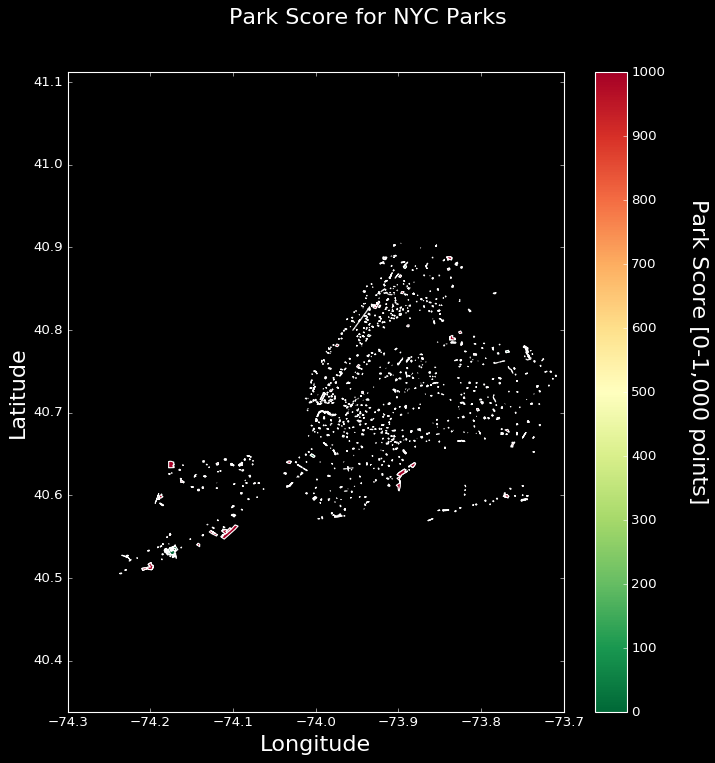

In [0]:
#plot average income in census tracts in NYC
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=[10,10]) #plots a blank graph
inspect_parks.plot("KATscore", cmap = "RdYlGn_r",legend=True,  ax=ax) #plots the park score for all the parks
ax.axis("equal") # make the scale the same for each axis 

# titles and labels
legend_text = fig.text(0.9, 0.55, "Park Score [0-1,000 points]", rotation=-90, fontsize=20, va="center")
fig.suptitle('Park Score for NYC Parks', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
print(' ')

# PROBLEM: CAN'T TELL THE GOOD PARKS FROM THE BAD PARKS, SO PLOT ONLY THE GOOD PARKS WITH KATscore=1000

In [0]:
# make a new DF with just the good parks
good_parks = inspect_parks.loc[inspect_parks['KATscore'] == 1000 ]
good_parks

,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,KATscore
0,B045,01,124176,Summer,5,2019-08-06,09:50 AM,10:20 AM,2019,18,57.0,A,A,NaN,NaN,15.0,Under Construction.,Exterior and interior of playground flooded wi...,PIP,08/06/2019 01:56:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...",1000
1,B045,10,125429,Fall,3,2019-10-03,09:39 AM,10:59 AM,2019,57,NaN,A,A,NaN,NaN,25.0,Partial Constr./Rest of Site Rated.,Construction work along Bradhurst & Edgecombe ...,PIP,10/03/2019 02:12:00 PM,7,True,{4BC72D1D-B298-42EF-9EB2-349D4E70B755},11237,0.027,"Knickerbocker Ave., Myrtle Ave., Bleecker St.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B045/,B-04,Heisser Triangle,B-04,B045,19210609000000.00000,False,Sitting Area/Triangle/Mall,DPR,5036,304,Heisser Triangle,B-04,Yes,B-04,83,Y,B045,100003755,Heisser Triangle,1424 MYRTLE AVENUE,53,PARK,18,37,B,No,"MULTIPOLYGON (((-73.91778 40.69878, -73.91789 ...",1000
2,B094,19,125041,Fall,2,2019-09-13,10:30 AM,10:40 AM,2019,16,NaN,A,A,NaN,NaN,5.0,NaN,SW not rated due to snow cover.,PIP,09/13/2019 02:39:00 PM,11,False,{9103CDC0-D772-4BB7-AB3B-503997E4E80F},11229,0.001,"E. 12 St., Kings Hwy., Quentin Rd.",Triangle/Plaza,20100106000000.00000,http://www.nycgovparks.org/parks/B094/,B-15,Sgt. Joyce Kilmer Triangle,B-15,B094,19340720000000.00000,False,Sitting Area/Triangle/Mall,DPR,6043,315,Sgt. Joyce Kilmer Triangle,B-15,Yes,B-15,61,Y,B094,100003699,Sgt. Joyce Kilmer Triangle,None,45,PARK,17,48,B,No,"MULTIPOLYGON (((-73.96082 40.60785, -73.96084 ...",1000
3,Q427,03,124997,Fall,2,2019-09-12,09:14 AM,09:25 AM,2019,59,NaN,A,A,NaN,NaN,0.0,NaN,Actual time of inspection: 10:52-11:00,PIP,09/12/2019 02:15:00 PM,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...",1000
4,Q427,05,52715,Summer,5,1907-08-17,10:02 AM,10:27 AM,1907,3,NaN,A,A,NaN,NaN,NaN,NaN,2 Trust For Public Land signs at entrance (wit...,SCHOOLS,NaN,5,False,{946CBA33-01D7-46FA-90E1-05F8963CA808},11434,0.942,134 Rd. and 173 St.,Jointly Operated Playground,20090423000000.00000,http://www.nycgovparks.org/parks/Q427/,Q-12,South Rochdale Playground,Q-12,Q427,19601021000000.00000,False,JOP,DPR/DOE,5365,412,South Rochdale Playground,Q-12,Yes,Q-12,113,Y,Q427,100000367,South Rochdale Playground,171-05 137 AVENUE,32,PARK,10,28,Q,No,"MULTIPOLYGON (((-73.76876 40.67385, -73.76874 ...",1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,Q225,08,125177,Fall,2,2019-09-23,10:00 AM,10:05 AM,2019,15,NaN,A,A,NaN,NaN,0.0,NaN,NaN,PIP,09/23/2019 01:25:00 PM,5,False,{0902490E-D278-419B

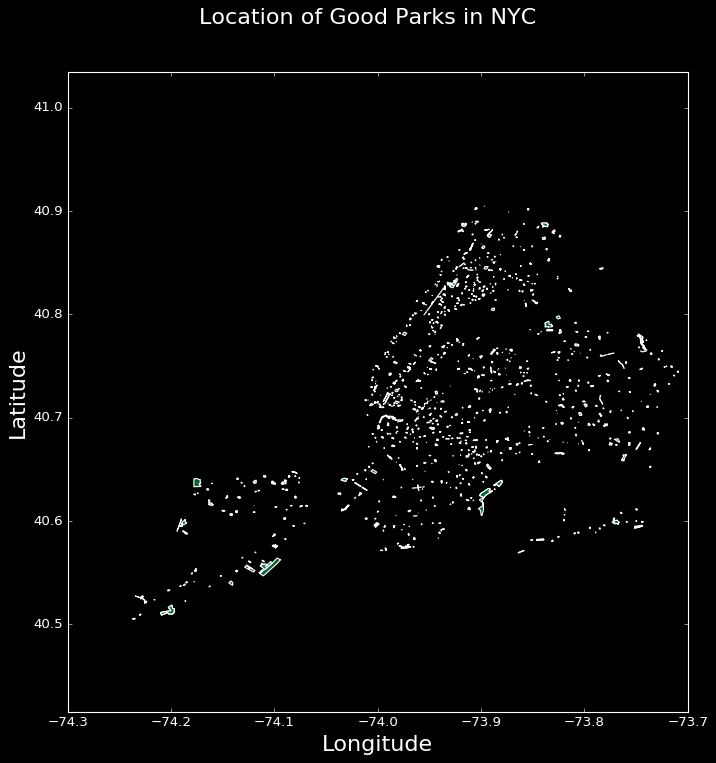

In [0]:
#plot average income in census tracts in NYC
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=[10,10]) #plots a blank graph
good_parks.plot("KATscore", cmap = "RdYlGn_r",  ax=ax) #plots the park score for all the parks
ax.axis("equal") # make the scale the same for each axis 

# titles and labels
#legend_text = fig.text(0.9, 0.55, "Park Score [0-1,000 points]", rotation=-90, fontsize=20, va="center")
fig.suptitle('Location of Good Parks in NYC', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
print(' ')


In [0]:
shp = econ_tract["geometry"].iloc[0]
econ_tract[econ_tract['geometry'] == shp]

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Id,Id2,Geography,Households; Estimate; Total,Households; Estimate; Median income (dollars),Households; Estimate; Mean income (dollars),park_tract
191,36,085,001700,36085001700,17,Census Tract 17,G5020,S,303568,0,+40.6343907,-074.0812548,"POLYGON ((-74.08508 40.63469, -74.08444 40.635...",1400000US36085001700,36085001700,"Census Tract 17, Richmond County, New York",594,41154,78363,0.0


In [0]:
pd.set_option("display.max_rows", 101)

In [0]:
inspect_parks.dtypes

Prop ID                         object
AMPSDistrict                    object
Inspection ID                    int64
Season                          object
Round                            int64
Date                    datetime64[ns]
BeginInspection                 object
EndInspection                   object
Inspection Year                  int64
inspector                        int64
inspector2                     float64
Overall Condition               object
Cleanliness                     object
Safety Condition                object
Structural Condition            object
VisitorCount                   float64
Closed?                         object
Comments                        object
InspectionType                  object
inspAddedDate                   object
us_congres                      object
mapped                          object
global_id                       object
zipcode                         object
acres                           object
location                 

In [0]:
shp = econ_tract["geometry"].iloc[0]
inpark_sub = inspect_parks[inspect_parks["geometry"].intersects(shp)]
econ_tract["park_tract"].iloc[0] = inpark_sub["acres"].sum()
inpark_sub

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Prop ID,AMPSDistrict,Inspection ID,Season,Round,Date,BeginInspection,EndInspection,Inspection Year,inspector,inspector2,Overall Condition,Cleanliness,Safety Condition,Structural Condition,VisitorCount,Closed?,Comments,InspectionType,inspAddedDate,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry,KATscore


In [0]:
shp = econ_tract["geometry"].iloc[0]
park_sub = park[park["geometry"].intersects(shp)]
econ_tract["park_tract"].iloc[0] = park_sub["acres"].sum()
park_sub

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,us_congres,mapped,global_id,zipcode,acres,location,typecatego,commission,url,permitpare,eapply,parentid,gispropnum,acquisitio,retired,subcategor,jurisdicti,objectid,communityb,name311,permitdist,pip_ratabl,department,precinct,permit,omppropid,gisobjid,signname,address,nys_assemb,class,nys_senate,councildis,borough,waterfront,geometry


In [0]:
econ_tract["meanincome"] = econ_tract["Households; Estimate; Mean income (dollars)"]
econ_tract.head() 

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,Id,Id2,Geography,Households; Estimate; Total,Households; Estimate; Median income (dollars),Households; Estimate; Mean income (dollars),park_tract,meanincome
191,36,085,001700,36085001700,17,Census Tract 17,G5020,S,303568,0,+40.6343907,-074.0812548,"POLYGON ((-74.08508 40.63469, -74.08444 40.635...",1400000US36085001700,36085001700,"Census Tract 17, Richmond County, New York",594,41154,78363,0.0,78363
192,36,085,000600,36085000600,6,Census Tract 6,G5020,S,1046778,1757917,+40.6181527,-074.0626420,"POLYGON ((-74.04908 40.61483, -74.04810 40.613...",1400000US36085000600,36085000600,"Census Tract 6, Richmond County, New York",1136,32778,70129,0.0,70129
193,36,085,000700,36085000700,7,Census Tract 7,G5020,S,632261,532954,+40.6473695,-074.0782043,"POLYGON ((-74.09125 40.64944, -74.09058 40.649...",1400000US36085000700,36085000700,"Census Tract 7, Richmond County, New York",2402,40147,52910,0.0,52910
194,36,085,001800,36085001800,18,Census Tract 18,G5020,S,1043953,1313874,+40.6019091,-074.0537589,"POLYGON ((-74.04633 40.60273, -74.05487 40.588...",1400000US36085001800,36085001800,"Census Tract 18, Richmond County, New York",186,83438,86017,0.0,86017
195,36,085,000300,36085000300,3,Census Tract 3,G5020,S,584130,1917454,+40.6446304,-074.0719887,"POLYGON ((-74.05623 40.63818, -74.06935 40.638...",1400000US36085000300,36085000300,"Census Tract 3, Richmond County, New York",987,72386,84554,0.0,84554


In [0]:
#print(merged_econ_rel[merged_econ_rel['tot_median_inc'] == '250,000+'])
#   test for problems in data
print(econ_tract[econ_tract['meanincome'] == '-'])
print(econ_tract[econ_tract['meanincome'] == '250,000+' ])

     STATEFP10 COUNTYFP10  ... park_tract meanincome
290         36        085  ...        0.0          -
378         36        085  ...        0.0          -
726         36        061  ...        0.0          -
817         36        061  ...        0.0          -
835         36        061  ...        0.0          -
847         36        061  ...        0.0          -
851         36        061  ...        0.0          -
908         36        061  ...        0.0          -
1008        36        061  ...        0.0          -
1043        36        061  ...        0.0          -
1218        36        047  ...        0.0          -
1227        36        047  ...        0.0          -
1268        36        047  ...        0.0          -
1722        36        047  ...        0.0          -
1838        36        047  ...        0.0          -
1888        36        047  ...        0.0          -
2000        36        047  ...        0.0          -
2069        36        047  ...        0.0     

In [0]:
#    Clean up the census income data; delete non-numeric rows
econ_tract = econ_tract[econ_tract['meanincome'] != "-"] #delete rows with "-"
econ_tract.dtypes

STATEFP10                                          object
COUNTYFP10                                         object
TRACTCE10                                          object
GEOID10                                            object
NAME10                                             object
NAMELSAD10                                         object
MTFCC10                                            object
FUNCSTAT10                                         object
ALAND10                                             int64
AWATER10                                            int64
INTPTLAT10                                         object
INTPTLON10                                         object
geometry                                         geometry
Id                                                 object
Id2                                                object
Geography                                          object
Households; Estimate; Total                         int64
Households; Es

In [0]:
#    convert meanincome column from object type to numeric type; fill any NaNs with 0
econ_tract['meanincome'] = pd.to_numeric(econ_tract['meanincome'], errors='coerce')
econ_tract['meanincome'] = econ_tract['meanincome'].fillna(0)

In [0]:
econ_tract.dtypes # ok the "meanincome" column is now a float and all values are numeric so it will plot properly

STATEFP10                                          object
COUNTYFP10                                         object
TRACTCE10                                          object
GEOID10                                            object
NAME10                                             object
NAMELSAD10                                         object
MTFCC10                                            object
FUNCSTAT10                                         object
ALAND10                                             int64
AWATER10                                            int64
INTPTLAT10                                         object
INTPTLON10                                         object
geometry                                         geometry
Id                                                 object
Id2                                                object
Geography                                          object
Households; Estimate; Total                         int64
Households; Es

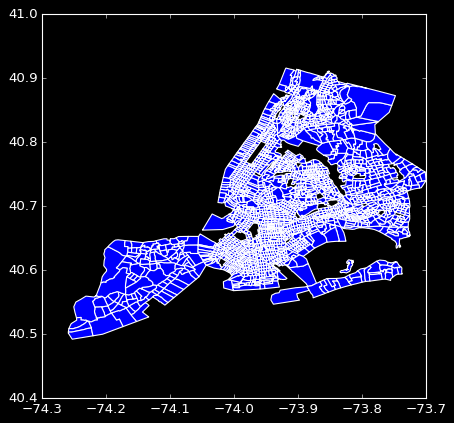

In [0]:
econ_tract.plot()

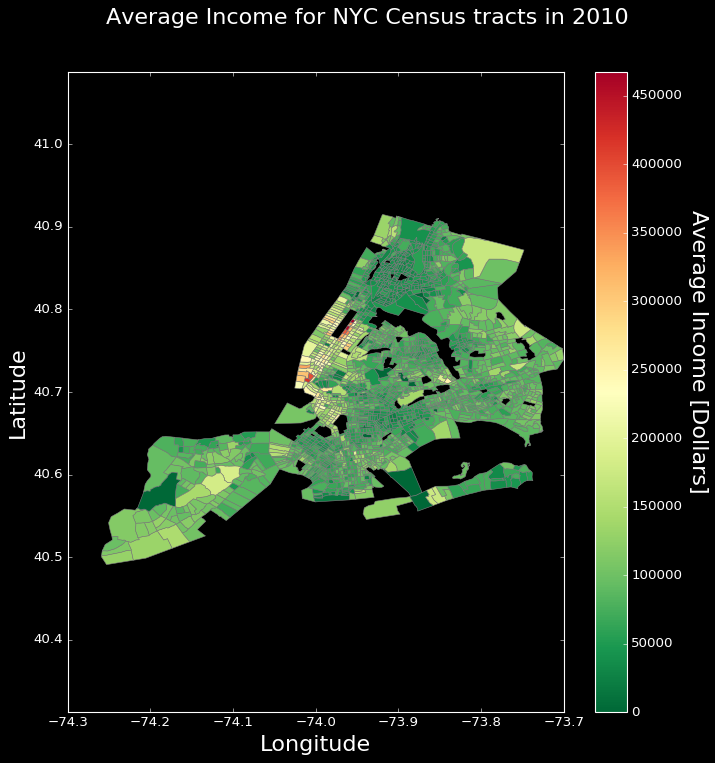

In [0]:
# Plotting mean income on the map + turn on Legend and make plot larger
fig, ax = plt.subplots(figsize=[10,10])
econ_tract.plot("meanincome", ax = ax, legend=True,  cmap = "RdYlGn_r", linewidth=0.5, edgecolor='0.5')
ax.axis("equal")

# titles and labels
legend_text = fig.text(0.9, 0.55, "Average Income [Dollars]", rotation=-90, fontsize=20, va="center")
fig.suptitle('Average Income for NYC Census tracts in 2010', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
print(' ')

In [0]:
# use the park scores to plot a "heat map" of the highest scoring parks


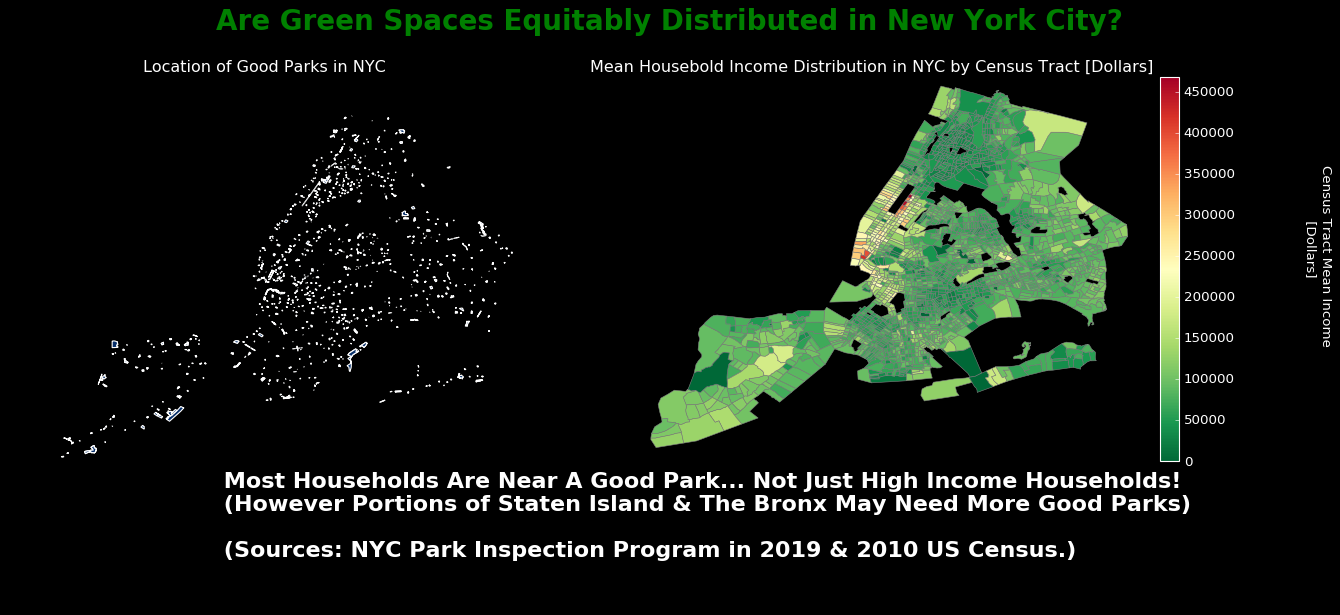

In [0]:
# -- Make a poster
plt.style.use("dark_background")

fig = plt.figure(figsize=[20,6])
ax  = fig.add_axes([0.5, 0.05, 0.4, 0.8])
econ_tract.plot("meanincome", cmap = "RdYlGn_r", legend=True, ax=ax, linewidth=0.5, edgecolor='0.5')
ax.set_title("Mean Housebold Income Distribution in NYC by Census Tract [Dollars]")
ax.axis("equal")
ax.axis("off")

cbt = fig.text(0.93, 0.475, "Census Tract Mean Income \n " +
                           "            [Dollars]", rotation=-90, fontsize=12, va="center", color="white")
header = fig.text(0.25, 0.95, "Are Green Spaces Equitably Distributed in New York City?", fontsize=25, color="green", weight="bold")
subheader = fig.text(0.25, 0.03, 
         " Most Households Are Near A Good Park... Not Just High Income Households! \n " +
         "(However Portions of Staten Island & The Bronx May Need More Good Parks) \n" +
         "\n" + 
         " (Sources: NYC Park Inspection Program in 2019 & 2010 US Census.)\n" + 
         "\n", color="white", weight="bold", va="top", fontsize=20, )

ax2 = fig.add_axes([0.08, 0.05, 0.4, 0.8])
good_parks.plot("KATscore", cmap="Blues_r", ax=ax2)
ax2.axis("off")
ax2.set_title("Location of Good Parks in NYC")
print(" ")